In [ ]:
pip install yfinance


In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
ticker_1 = "EURUSD=X"
data = yf.download(ticker_1, start="2021-01-01", end="2025-02-24")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [5]:
data.head

<bound method NDFrame.head of Price          Close      High       Low      Open   Volume
Ticker      EURUSD=X  EURUSD=X  EURUSD=X  EURUSD=X EURUSD=X
Date                                                       
2021-01-01  1.218027  1.221699  1.213499  1.217285        0
2021-01-04  1.225070  1.230999  1.217137  1.224905        0
2021-01-05  1.225160  1.229483  1.224995  1.225295        0
2021-01-06  1.230027  1.235025  1.226693  1.229861        0
2021-01-07  1.234111  1.234568  1.224665  1.233776        0
...              ...       ...       ...       ...      ...
2025-02-17  1.048922  1.050707  1.046737  1.048922        0
2025-02-18  1.048537  1.048647  1.044277  1.048537        0
2025-02-19  1.044834  1.046244  1.040507  1.044834        0
2025-02-20  1.042101  1.047878  1.041971  1.042101        0
2025-02-21  1.050056  1.050751  1.044998  1.050056        0

[1080 rows x 5 columns]>

In [7]:
df = pd.DataFrame(data.iloc[:, :-1])

<Axes: xlabel='Date'>

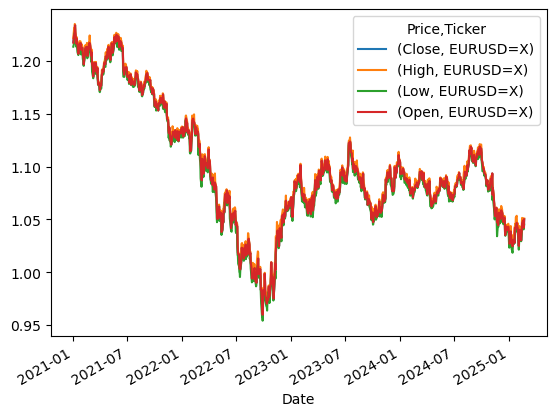

In [9]:
# df.tail
df.plot()

<Axes: xlabel='Date'>

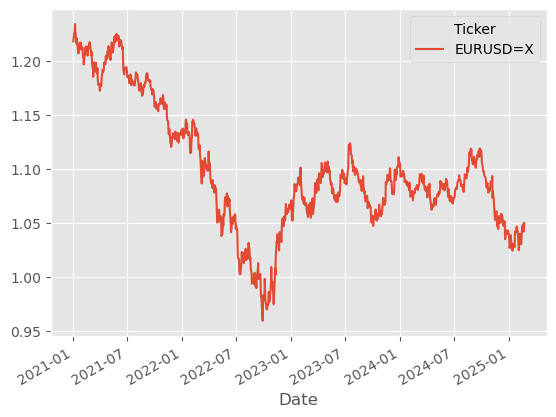

In [13]:
plt.style.use('ggplot')
df['Close'].plot()

In [ ]:
# pip install arch

In [15]:
df['Returns'] = df['Close'].pct_change().dropna()

<Axes: xlabel='Date'>

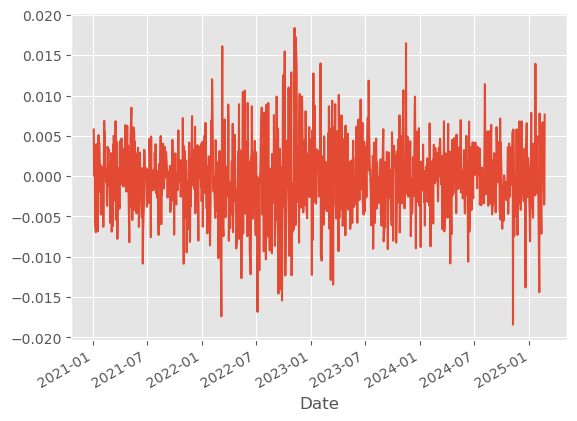

In [17]:
df['Returns'].plot()

In [19]:
from arch import arch_model

In [21]:
model = arch_model(df['Returns'].dropna(), vol= 'Garch', p=1, q=1)
fitted_model = model.fit(update_freq = 5)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -4305.735090601824
            Iterations: 6
            Function evaluations: 18
            Gradient evaluations: 2


C:\ProgramData\anaconda3\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 2.167e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [23]:
fitted_model.summary

<bound method ARCHModelResult.summary of                      Constant Mean - GARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                4305.74
Distribution:                  Normal   AIC:                          -8603.47
Method:            Maximum Likelihood   BIC:                          -8583.54
                                        No. Observations:                 1079
Date:                Tue, Feb 25 2025   Df Residuals:                     1078
Time:                        21:15:46   Df Model:                            1
                                   Mean Model                                  
                  coef    std err          t      P>|t|        95.0% Conf. Int.
-------------------------------------------------------------------------------
mu      

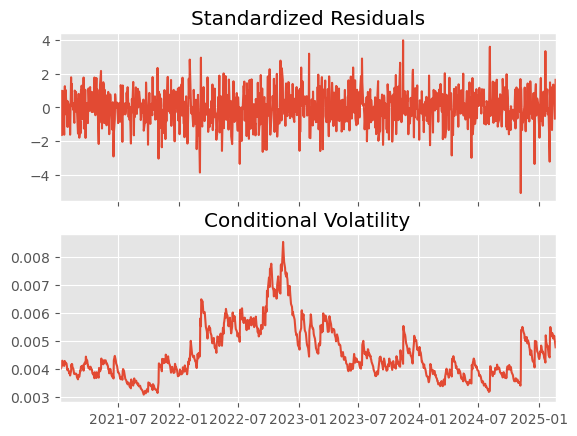

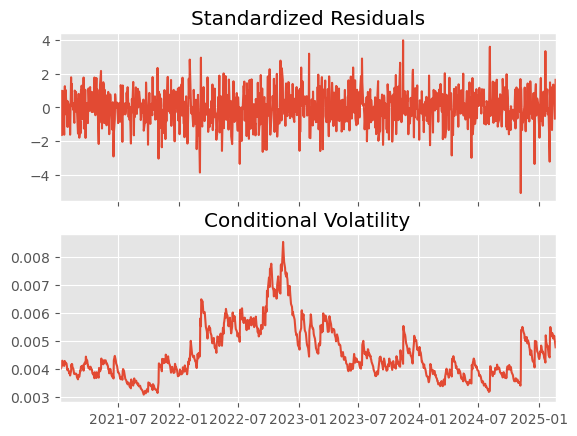

In [33]:
# forecast = fitted_model.forecast(horizon=5)
# forecast.variance.head()
fitted_model.plot()

In [35]:
# import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

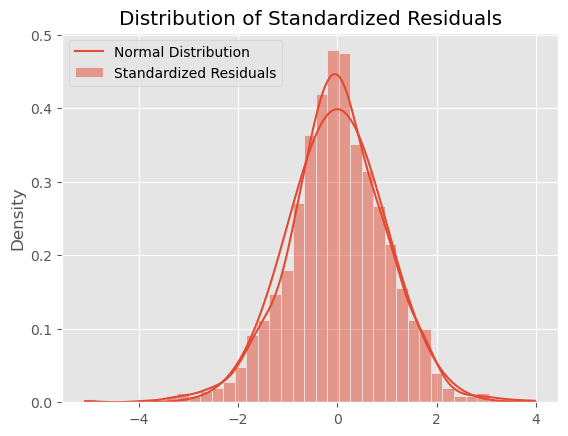

In [39]:
sns.histplot(fitted_model.resid / fitted_model.conditional_volatility, kde=True, stat="density", label="Standardized Residuals")
x = np.linspace(-4, 4, 100)
plt.plot(x, norm.pdf(x), label="Normal Distribution")
plt.title("Distribution of Standardized Residuals")
plt.legend()
plt.show()

In [53]:
# pip install statsmodels
from statsmodels.graphics.gofplots import qqplot

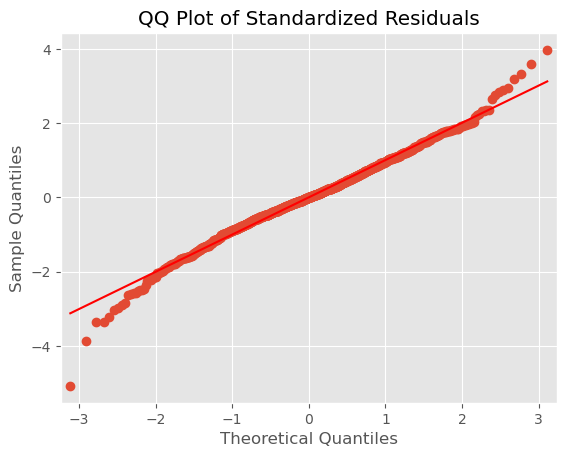

In [57]:
# from sklearn.preprocessing import MinMaxScaler
qqplot(fitted_model.resid / fitted_model.conditional_volatility, line="s")
plt.title("QQ Plot of Standardized Residuals")
plt.show()

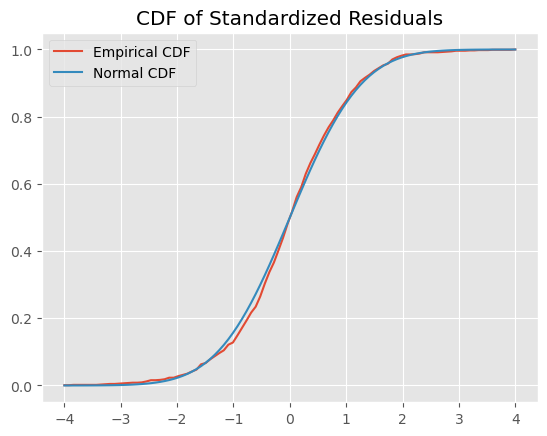

In [61]:
from statsmodels.distributions.empirical_distribution import ECDF

ecdf = ECDF(fitted_model.resid / fitted_model.conditional_volatility)
x = np.linspace(-4, 4, 100)
plt.plot(x, ecdf(x), label="Empirical CDF")
plt.plot(x, norm.cdf(x), label="Normal CDF")
plt.title("CDF of Standardized Residuals")
plt.legend()
plt.show()

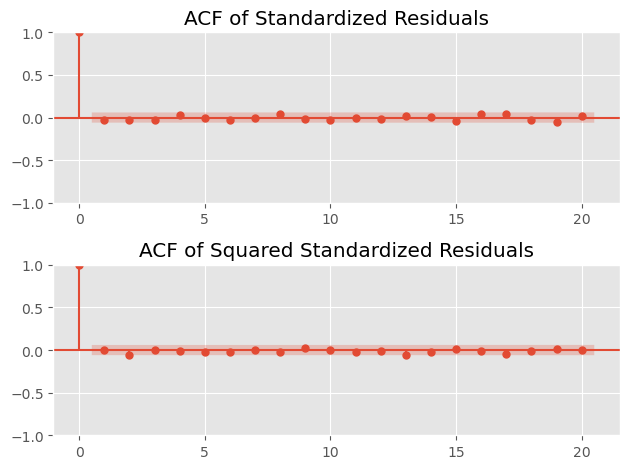

In [81]:
from statsmodels.graphics.tsaplots import plot_acf

# ACF of standardized residuals
fig, ax = plt.subplots(2,1)

plot_acf(fitted_model.resid / fitted_model.conditional_volatility, lags=20, ax=ax[0])
ax[0].set_title("ACF of Standardized Residuals")


plot_acf((fitted_model.resid / fitted_model.conditional_volatility)**2, lags=20, ax=ax[1])
ax[1].set_title("ACF of Squared Standardized Residuals")
plt.tight_layout()
plt.show()



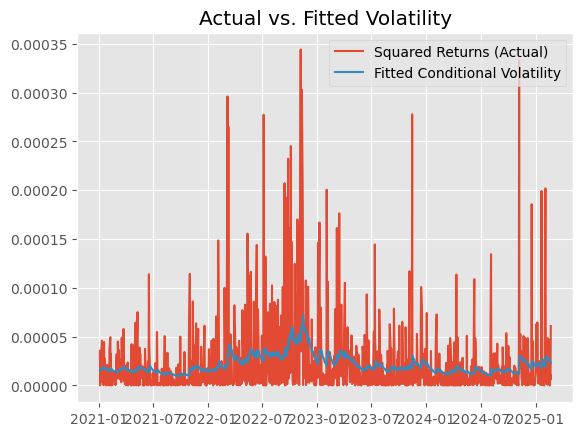

In [83]:
plt.plot(fitted_model.resid**2, label="Squared Returns (Actual)")
plt.plot(fitted_model.conditional_volatility**2, label="Fitted Conditional Volatility")
plt.title("Actual vs. Fitted Volatility")
plt.legend()
plt.show()

In [ ]:
# df['Close'].tail
# Close_price = df['Close'].values.reshape(-1,1)
# scaler = MinMaxScaler(feature_range=(0,1))
# scaled_prices = scaler.fit_transform(Close_price)

In [ ]:
def create_sequences(df, seq_length):
    X, y = [], []
    for i in range(len(df) - seq_length):
        X.append(df[i:i+seq_length])
        y.append(df[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 30
X, y = create_sequences(scaled_prices, seq_length)

In [ ]:
train_size = int(len(X) * 0.8)
# X_train, X_test = X[:train_size], X[train_size:]
# y_train, y_test = y[:train_size], y[train_size:]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
model = Sequential()

In [ ]:
# model.add(LSTM(50, return_sequences=True, input_shape=(seq_length,1)))
# model.add(LSTM(50))
# model.add(Dense(1))
# model.compile(optimizer='adam', loss='mse')